**["Writing Math Equations"](https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214)**

**["LaTeX: Symbols"](https://artofproblemsolving.com/wiki/index.php/LaTeX:Symbols)**

In [1]:
import pandas as pd
import numpy as np

from random import randint
from random import uniform
from random import random
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as scistats

import math
import statistics as stats

In [2]:
# FUNCIONES:

def stats_list (data):
    """ Grafico la distribución de una lista de numeros y señala la media, mediana y moda. """
    
    sns.set_theme(style = 'darkgrid')

    sns.displot(x = data, binwidth=6, height=6, kde = True)
    
    plt.axvline(np.median(data),color='r') #Median = RED
    plt.axvline(np.mean(data), color = 'g', linestyle = '--') #Mean = GREEN
    
def stats_df (df, col):
    """ Grafico la distribución de una columna de un D.F. señala la media, mediana y moda. """

    sns.set_theme(style = 'darkgrid')

    sns.displot(df, x = col, binwidth=6, height=6, kde = True)
    
    plt.axvline(np.median(df[col]),color='r') #Median = RED
    plt.axvline(np.mean(df[col]), color = 'g', linestyle = '--') #Mean = GREEN
    plt.axvline(df[col].mode()[0], color = 'y', linestyle = '--') #Mode = YELLOW
    
def mediana(x):
    """Mediana de una lista de numeros"""
    if len(x)%2 == 0:
        return x[int(len(x)/2)]
    else:
        n = len(x)/2     
        return (x[int(n+0.5)] + x[int(n-0.5)])/2
    
N = [randint(0,100) for i in range(500_000)]

tamaño_muestral = 50_000
n = mustra = [[randint(0,100)] for i in range(tamaño_muestral)]

In [3]:
df = pd.read_csv('Data/StudentsPerformance.csv')

In [4]:
N = [randint(0,100) for i in range(100_000)]

tamaño_muestral = 5_000
n = [N[randint(0,100_000)] for i in range(tamaño_muestral)]

# Fundamentos de la Estadistica Inferencial.


- ## Distribución:
 - Es una función que muestra los posibles valores para una variable y con que frecuencia ocurren.

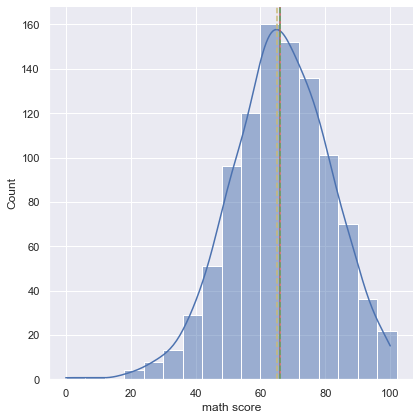

In [5]:
stats_df(df, 'math score')

### - Si la linea de la media esta ubicada a la izquierda de la linea de la mediana, significa que los datos estan sesgados a la izquierda, y viceversa. Es decir que la cola tiende en la dirección del sesgo.

# - Estandarización o Normalización ( z ).

  Es la adaptación de una serie de datos a un modelo de referencia o escala común. Este proceso permite relativizar los modelos, llevandolos a una misma escala y permitiendonos comparar valores que se encuentren en distintas escalas. 
  
  Si normalizamos una distribución normal lo que haremos es llevar su desviación estándar a ' 1 ' y su media a ' 0 ', $\sim{N} (\mu = 0 ;   \sigma^2 = 1)$, y conseguiremos una Desviación Normal Estándar.
  
Su ecuación es la siguiente: 
## $$ z = \frac{x - \mu}{\sigma}$$

El el resultado de la división de la resta del valor original menos su media entre su desviación estandar.

In [6]:
𝜎 = stats.stdev(df['math score']) # Desviacion Estandar Poblacional.
𝜇 = np.mean(df['math score']) # Media Poblacional.

print('\n Datos sin estandarizar: \n Desv. Estandar = 𝜎 = {} \n Media = 𝜇 = {} \n Mediana = {} \n'\
      .format(stats.stdev(N), np.mean(N), mediana(df['math score'])))


 Datos sin estandarizar: 
 Desv. Estandar = 𝜎 = 29.23497489330152 
 Media = 𝜇 = 50.01516 
 Mediana = 74 




 Datos estandarizados a traves de ecuación: 
 Desv. Estandar 𝜎 = 1.0 
 Media 𝜇 = 9.947598300641403e-17 
 Mediana m = 0.521727772319951 



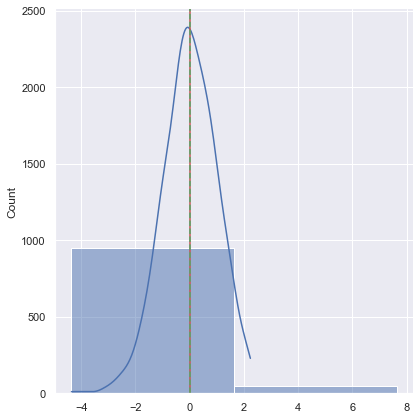

In [7]:
z = [(x - 𝜇)/𝜎 for x in df['math score']]

print('\n Datos estandarizados a traves de ecuación: \n Desv. Estandar 𝜎 = {} \n Media 𝜇 = {} \n Mediana m = {} \n'\
      .format(stats.stdev(z), np.mean(z), mediana(z))) 
stats_list(z)


 Datos estandarizados a travez de función: 
 Desv. Estandar 𝜎 = 1.0005003753127737 
 Media 𝜇 = 8.704148513061228e-17 
 Mediana m = 0.5219888320172085 



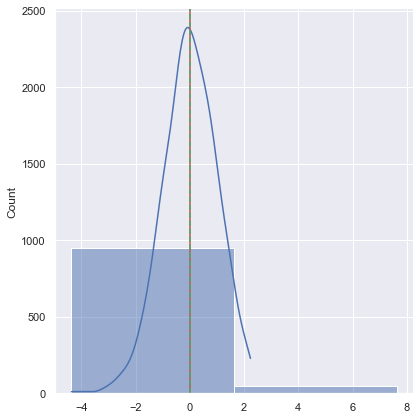

In [8]:
z_fun = scistats.zscore(df['math score'], axis=0)
print('\n Datos estandarizados a travez de función: \n Desv. Estandar 𝜎 = {} \n Media 𝜇 = {} \n Mediana m = {} \n'\
      .format(stats.stdev(z_fun), np.mean(z_fun), mediana(z_fun)))
stats_list(z_fun)

# - Teorema del Limite Central (TLC).

  - Este teorema plantea que cuando el tamaño de la muestra es lo suficientemente grande, la distribución de las medias sigue aproximadamente una distribución normal. Es decir, si poseemo un conjunto de muestras relativamente pequeñas, y cuyas distribuciones por si solas no son normales, estas tenderan a distribuirse de manera normal y la tendencia será proporcional al tamaño de las muestras obtenidas y ademas su media será igual o muy aproximada a la de la población, siempre y cuando las muestras sean obtenidas de una misma poblacion con varianza finita.  
  
  - Ademas se espera que la distribución de las medias muestrales tenga una varianza igual a la varianza del conjunto de datos otiginal, dividida pror el tamaño de la muestra.
  
  Desviación estándar de la población = 
## $$ \sqrt{\frac{\sigma^2}{n}} $$
  
  ### - Una distribución formada por medias muestrales se define como " Distribución de Medias Muestrales "

In [10]:
df = pd.DataFrame(N, columns = ['Data'])
df.shape

(100000, 1)


Datos de la distribucion de medias muestrales: 
 Varianza 𝜎^2 = 0.028929997583673487 
 Desv. Estandar 𝜎 = 0.41241751333376375 
 Media 𝜇 = 49.79728 
 Mediana m = 49.748 

Datos de la población: 
 Varianza 𝜎^2 = 854.6837570119701 
 Desv. Estandar 𝜎 = 29.23497489330152 
 Media 𝜇 = 50.01516 
 Mediana m = 21 



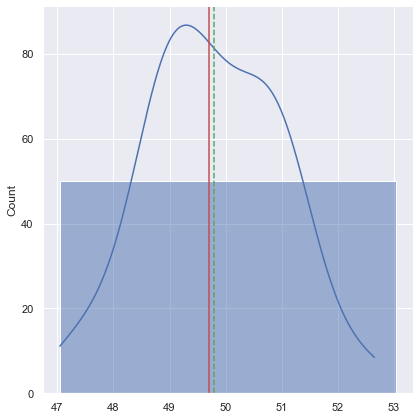

In [11]:
# lista de muestras aleatorias:
Sn = [df['Data'].sample(500).mean() for x in range(50)]
print('\nDatos de la distribucion de medias muestrales: \n Varianza 𝜎^2 = {} \n Desv. Estandar 𝜎 = {} \n Media 𝜇 = {} \n Mediana m = {} \n'\
      .format(stats.variance(Sn)/len(Sn), np.sqrt(stats.stdev(Sn)/np.sqrt(len(Sn))), np.mean(Sn), mediana(Sn)))


stats_list(Sn)

print('Datos de la población: \n Varianza 𝜎^2 = {} \n Desv. Estandar 𝜎 = {} \n Media 𝜇 = {} \n Mediana m = {} \n'\
      .format(stats.variance(df['Data']), stats.stdev(df['Data']), np.mean(df['Data']), mediana(df['Data'])))

# Tabla Z o Tabla Normal Estándar:

    La Tabla Z se utiliza para determinas la probabilidad de que se observe una muestra estadistica por por encima de un valore dado de una distribución normal estándar (Z), y por extensión, de cualquier distribución normal.
  
> La tabla Z solo sirve para calcular el area o la probabilidad (P) de que en la distribución normal estándar (Z) exista un numero igual o menor ($ \le $) que z.  
  
## $$ P(Z\le{z}) $$

> La tabla Z solo sirve para calcular directamente el área por debajo de un valor positivo, desde z hasta -∞, por lo tanto, para calcular areas de modos distintos hay que buscarse la vida.



## - Area por encima de un valor positivo:

Es el valor restante de la posibilidad de estar por encima de z, es decir, 1 menos la probabilidad de estar por debajo de z.
   ## $$ P(Z > z) = 1 - P(Z\le{z}) $$ 

##  - Área por encima de un valor negativo:

Por simetria, el area por encima de -z es la misma que el area por detras de z.
   ## $$ P(Z > -z) = P(Z\le{z}) $$

## - Área por debajo de un valor negativo:
Por simetria, el area que queda por debajo de un valor negativo (-z), es, al mismo tiempo, el mismo que quedaría por encima de un valor positivo (z y ecuación compatible con la tabla), sin embargo, ya que la tabla solo proporciona el area por encima de un valor positivo, la diferencia restante del area por encima de z positivo es igual al area por debajo de z negativo.
   ## $$P(Z\le{-z}) = P(Z>z) = 1 - P(Z \le{-z}) $$

## - Área entre dos valores:
La probabilidad de estar entre $ z_1 $ y $ z_2 $, es igual a la probabilidad de estar debajo del mayor de los valores ($z_2$) menos la probabilidad de estar por debajo del menor de los valores ($z_1$).

   ## $$ P(z_{1} < Z \le{z_{2}}) = P(Z \le z_{2}) - P(Z \le z_{1})$$

<img src="Data\Tabla_Z.png">

# - Error Estándar ( ES ).

   - Es la desviación estandar de la distribución formada por la muestra, es decir, la distribución tipica de la distribución muestral, y aún mas sencillo, es la desviación estándar de todas las posibles muestras (de un tamaño dado) escogidas de una población y representa la variabilidad que tendría un conjunto de datos con respecto a la población, y representa el rango en el que se mueven los datos.
   
   - Es decir, si el valor medio de una muestra es ' x ' y su error estandar es ' y ', el valor estaría oscilando en un rango de x - y y x + y puntos, o simplemente +/- y, esto es porque los datos obtenidos de una muestra son aproximados.
   
## $$ \frac{\sigma}{\sqrt{n}} $$

In [12]:
def St_Error(n):
    list(n)
    return stats.stdev(n) / np.sqrt(len(n))

St_Error(df['Data'])

0.09244910800067084

# - Factor de Fiabilidad.

Esta es la expresión del factor de fiabilidad:
# $$ Z_{\frac{\alpha}{2}} $$

Así se calcula:
## $$ \alpha =  1 - \frac{1 - \frac{\% confianza}{100}}{2} $$

- Z es la variable estandarizada que tiene una destribución normal Estándar
## $$ Z \sim N(\mu = 0;{\sigma} = 1) $$
    la z sub 𝛼 viene de la tabla de distribución normal

### - Una vez obtenido el factor de fiabilidad se procede a buscarlo dentro de la tabla Z. 

In [13]:
def factor_fiabilidad (nivel_de_confianza):
    return 'Busca en la Tabla Z el valor mas cercano a = {}'.format(1 - ((1 - (nivel_de_confianza/100))/2))

factor_fiabilidad(95)

'Busca en la Tabla Z el valor mas cercano a = 0.975'

# - Intervalo de Confianza ( IC ).
   - Es el rango dentro del cual se espera que esté el parametro poblacional y se aplica sobre una población normalmente distribuida.
   - Existen dos situaciones principales en las que calcular el IC de una poblacion:
     - Cuando se conoce la varianza poblacional.
     - Cuando se desconoce la varianza poblacional.
     
## IC para una varianza conocida: 

# $$\bar{x} - Z_{\frac{\alpha}{2} \frac{\sigma}{\sqrt{n}}},   \bar{x} + Z_{\frac{\alpha}{2}\frac{\sigma}{\sqrt{n}}}$$

-   La media de la muestra menos o mas la Z de 𝛼 entre 2 multiplicado por el error estandar.

# - Distribución t o t de Student ( t ).
  -  Es una distribución 
  
  La t de Student nos permite la inferencia a partir de pequeñas muestras con una varianza poblacional desconocida, ya que esta surge del problema de estimar la media de una población normalmente distribuida, cuando el tamaño muestral es pequeño.
  
## $$ t_{n-1}, \alpha = \frac{\bar{x} - \mu }{\frac{s}{\sqrt{n}}} $$

<img src="Data\Tabla_T.png">

# Intervalos de Confianza con valor t.

Con varianza desconocida:
## $$ \bar{x} \pm t_{n - 1}, \frac{\alpha}{2} \frac{S}{\sqrt{n}}$$

> Esta formula, la del valor t, se aplica cuando desconocemos la varianza poblacional, sin embargo, si la llegasemos a obtener debemos trabajar con la estadistica z. 

# Intervalos de confianza para dos muestras dependientes. 

## - Varianzas Poblacionales Conocidas:

  - Para calcular la varianza de dos diferencias se utiliza esta formula:
   ## $$ \sigma^2_{diff} = \frac{\sigma^2_1}{n_1} + \frac{\sigma^2_2}{n_2}$$
   
  - El intervalo de confianza se calcula de la siguiente manera:
   ## $$ (\bar{x} - \bar{y}) \pm z_{\frac{\alpha}{2}} \sqrt{\frac{\sigma^2_x}{n_x} + \frac{\sigma^2_y}{n_y}} $$

 > $$(\bar{x} - \bar{y})$$ Es el estimador de diferencia puntual, es decir, la resta entre las medias de cada muestra.

 > Calculamos la raiz de la suma de las varianzas ya que estan al cuadrado, si las convirtieramos a desviación la formula sería esta. $$ \frac{\sigma_x}{\sqrt{n_x}} + \frac{\sigma_y}{\sqrt{}n_y}$$
 
 > Por simetria, si los resultados son negativos estos se pueden convertir a positivos sin problema.

## - Varianzas Poblacionales Desconocidas pero se asumen iguales:

   - Formula para calcular la varianza muestral combinada o conjunta:
   ## $$ S^2_p = \frac{(n_x - 1) S^2_x + (N_y - 1) S^2_y}{n_x + n_y - 2} $$
   
   - Formula para calcular el intervalo de confianza con estadistica t:
   ## $$ (\bar{x} - \bar{y}) \pm t_{n_x + n_y} - 2, \frac{\alpha}{2} \sqrt{\frac{S^2_p}{n_x} + \frac{S^2_p}{n_y}} + $$
   
   > Esta formula es bastante consisteste respecto a la formula que calcula la varianza para una muestra conocida, aunque su diferencia fundamental, debido a que la varianza poblacional es desconocida, es la estadistica t, en donde n es la suma de ambos tamaños muestrales y a $\alpha$ se le resta 2 debido a que estamos calculando 2 variables.
   
   > Otra diferencia importante es que utilizamos la varianza muestras combinada ( $ S^2_p $ ) en vez de la varianza muestras individual ( $\sigma^2_x$ ). 